In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

In [18]:
df = pd.read_csv('downloaded_from_mendeley/weaving_rejection_dataset - original.csv')

In [19]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [20]:
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'Total_Pdn(yds)',
       'Rejection', 'warp_count',  'weft_count',
       'epi', 'ppi']]

In [21]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


In [22]:
X = df.copy()
y = X.pop('Rejection')

In [23]:
X.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),warp_count,weft_count,epi,ppi
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,27646.0,double_40,80.0,110,80
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,11019.0,40,40.0,110,90
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,40,40.0,110,80
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,40,40.0,130,80
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,50,50.0,140,70


In [24]:
y.head()

0     285
1      39
2       0
3      58
4    1043
Name: Rejection, dtype: int64

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [26]:
X_train.select_dtypes('O').value_counts()

warp_count
40            11742
50             2113
30              593
60              316
20              288
double_80       176
double_40       148
120              16
100              12
70                3
dtype: int64

In [27]:
def label_encoding(x):
    def resultant_count(x1,x2):
        return int( (x1*x2)/(x1+x2) ) 
    if x == 'double_80':
        return resultant_count(80,80)
    elif x == 'double_40':
        return resultant_count(40,40)
    else:
        return int(x)

In [28]:
X_train['warp_count']= X_train['warp_count'].apply(lambda x: label_encoding(x))
X_test['warp_count'] = X_test['warp_count'].apply(lambda x: label_encoding(x))

In [29]:
X_train.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),warp_count,weft_count,epi,ppi
20464,3420.0,8.1,4128.340,10.0,3721.436344,3781.025303,3431.0,50,50.0,140,70
11738,2250.0,7.8,2679.320,9.0,2440.347072,2452.176370,399.0,40,40.0,120,80
6501,2700.0,8.0,3422.968,14.0,2934.782609,3120.462616,2776.0,40,40.0,130,80
17892,1975.0,8.0,2504.344,15.0,2146.739130,2309.414272,2098.0,40,40.0,110,90
16204,1200.0,9.8,1552.912,15.0,1330.376940,1431.189961,1293.0,50,50.0,130,80


In [30]:
X_all = pd.concat([X_train, X_test], axis=0 )
y_all = pd.concat([y_train, y_test], axis=0 )

In [31]:
X_all.shape, y_all.shape

((22010, 11), (22010,))

In [32]:
#models
models = {'rnf': RandomForestRegressor() , 'cat': CatBoostRegressor(), 'light_gbm': lightgbm.LGBMRegressor(), 
          'xgboost': XGBRegressor(), 'lr': LinearRegression(), 'laso': Lasso(), 'elastonet': ElasticNet(),
         'elastonet_cv': ElasticNetCV(), 'ridge': Ridge(), 'decision_tree': DecisionTreeRegressor(),
          'knn': KNeighborsRegressor(), 'adaboost': AdaBoostRegressor(), 'svm': SVR()   } 

In [33]:
from sklearn.metrics import r2_score
def calculate_r2_score(models, X_train, y_train, X_test):
    r2_dict ={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_score_ = r2_score(y_test, y_pred)
        r2_dict[model_name] = r2_score_
    return r2_dict

In [36]:
r2_dict_df=calculate_r2_score(models, X_train, y_train, X_test)

Learning rate set to 0.063072
0:	learn: 158.6936746	total: 151ms	remaining: 2m 30s
1:	learn: 151.7317107	total: 153ms	remaining: 1m 16s
2:	learn: 145.3680949	total: 157ms	remaining: 52.1s
3:	learn: 139.1121389	total: 159ms	remaining: 39.6s
4:	learn: 133.2844199	total: 163ms	remaining: 32.4s
5:	learn: 128.0266938	total: 166ms	remaining: 27.6s
6:	learn: 123.0860476	total: 169ms	remaining: 24s
7:	learn: 118.4550981	total: 173ms	remaining: 21.5s
8:	learn: 114.1918817	total: 179ms	remaining: 19.7s
9:	learn: 110.2003477	total: 182ms	remaining: 18s
10:	learn: 106.4972911	total: 185ms	remaining: 16.7s
11:	learn: 103.2554160	total: 188ms	remaining: 15.5s
12:	learn: 100.2266223	total: 191ms	remaining: 14.5s
13:	learn: 97.3886071	total: 194ms	remaining: 13.6s
14:	learn: 94.7611881	total: 196ms	remaining: 12.9s
15:	learn: 92.2433337	total: 199ms	remaining: 12.2s
16:	learn: 89.8982170	total: 205ms	remaining: 11.9s
17:	learn: 87.8755299	total: 208ms	remaining: 11.4s
18:	learn: 85.9518263	total: 212m

157:	learn: 54.3935970	total: 599ms	remaining: 3.19s
158:	learn: 54.3303154	total: 602ms	remaining: 3.18s
159:	learn: 54.2620023	total: 605ms	remaining: 3.17s
160:	learn: 54.2340306	total: 607ms	remaining: 3.16s
161:	learn: 54.2070668	total: 610ms	remaining: 3.15s
162:	learn: 54.1611707	total: 612ms	remaining: 3.14s
163:	learn: 54.1476714	total: 615ms	remaining: 3.13s
164:	learn: 53.8973323	total: 618ms	remaining: 3.13s
165:	learn: 53.8822104	total: 623ms	remaining: 3.13s
166:	learn: 53.8283368	total: 628ms	remaining: 3.13s
167:	learn: 53.7664993	total: 631ms	remaining: 3.13s
168:	learn: 53.7366513	total: 634ms	remaining: 3.12s
169:	learn: 53.7235007	total: 636ms	remaining: 3.1s
170:	learn: 53.6527880	total: 640ms	remaining: 3.1s
171:	learn: 53.5801212	total: 643ms	remaining: 3.09s
172:	learn: 53.5452525	total: 646ms	remaining: 3.09s
173:	learn: 53.4680253	total: 650ms	remaining: 3.08s
174:	learn: 53.4003276	total: 654ms	remaining: 3.08s
175:	learn: 53.1848182	total: 659ms	remaining: 3

388:	learn: 45.7978990	total: 1.2s	remaining: 1.89s
389:	learn: 45.7707914	total: 1.21s	remaining: 1.89s
390:	learn: 45.7586316	total: 1.21s	remaining: 1.88s
391:	learn: 45.7489319	total: 1.21s	remaining: 1.88s
392:	learn: 45.7290268	total: 1.21s	remaining: 1.87s
393:	learn: 45.7209261	total: 1.22s	remaining: 1.87s
394:	learn: 45.7096598	total: 1.22s	remaining: 1.87s
395:	learn: 45.6504644	total: 1.22s	remaining: 1.86s
396:	learn: 45.6466367	total: 1.22s	remaining: 1.86s
397:	learn: 45.6341040	total: 1.23s	remaining: 1.85s
398:	learn: 45.6131902	total: 1.23s	remaining: 1.85s
399:	learn: 45.5879621	total: 1.23s	remaining: 1.85s
400:	learn: 45.5704149	total: 1.24s	remaining: 1.84s
401:	learn: 45.5538527	total: 1.24s	remaining: 1.84s
402:	learn: 45.5381909	total: 1.24s	remaining: 1.84s
403:	learn: 45.5267632	total: 1.24s	remaining: 1.83s
404:	learn: 45.5211163	total: 1.24s	remaining: 1.83s
405:	learn: 45.4917896	total: 1.25s	remaining: 1.82s
406:	learn: 45.3999613	total: 1.25s	remaining: 

553:	learn: 43.4547415	total: 1.62s	remaining: 1.3s
554:	learn: 43.4526703	total: 1.62s	remaining: 1.3s
555:	learn: 43.4452617	total: 1.62s	remaining: 1.29s
556:	learn: 43.4400674	total: 1.62s	remaining: 1.29s
557:	learn: 43.4318837	total: 1.63s	remaining: 1.29s
558:	learn: 43.4297594	total: 1.63s	remaining: 1.28s
559:	learn: 43.4250249	total: 1.63s	remaining: 1.28s
560:	learn: 43.4217054	total: 1.63s	remaining: 1.28s
561:	learn: 43.4102025	total: 1.64s	remaining: 1.27s
562:	learn: 43.3968104	total: 1.64s	remaining: 1.27s
563:	learn: 43.3897589	total: 1.64s	remaining: 1.27s
564:	learn: 43.3816150	total: 1.64s	remaining: 1.26s
565:	learn: 43.3664701	total: 1.64s	remaining: 1.26s
566:	learn: 43.3596272	total: 1.65s	remaining: 1.26s
567:	learn: 43.3536558	total: 1.65s	remaining: 1.25s
568:	learn: 43.3441693	total: 1.65s	remaining: 1.25s
569:	learn: 43.3409795	total: 1.66s	remaining: 1.25s
570:	learn: 43.3284462	total: 1.66s	remaining: 1.25s
571:	learn: 43.3213703	total: 1.66s	remaining: 1

715:	learn: 42.3027123	total: 2.02s	remaining: 801ms
716:	learn: 42.2991912	total: 2.02s	remaining: 798ms
717:	learn: 42.2966245	total: 2.02s	remaining: 795ms
718:	learn: 42.2892215	total: 2.03s	remaining: 792ms
719:	learn: 42.2869102	total: 2.03s	remaining: 789ms
720:	learn: 42.2855946	total: 2.03s	remaining: 786ms
721:	learn: 42.2814933	total: 2.04s	remaining: 784ms
722:	learn: 42.2777093	total: 2.04s	remaining: 781ms
723:	learn: 42.2742652	total: 2.04s	remaining: 778ms
724:	learn: 42.2704522	total: 2.04s	remaining: 776ms
725:	learn: 42.2606735	total: 2.05s	remaining: 773ms
726:	learn: 42.2323494	total: 2.05s	remaining: 770ms
727:	learn: 42.2267685	total: 2.05s	remaining: 766ms
728:	learn: 42.2193827	total: 2.05s	remaining: 763ms
729:	learn: 42.2179548	total: 2.06s	remaining: 760ms
730:	learn: 42.2126806	total: 2.06s	remaining: 757ms
731:	learn: 42.2089146	total: 2.06s	remaining: 754ms
732:	learn: 42.2029373	total: 2.06s	remaining: 751ms
733:	learn: 42.1913519	total: 2.06s	remaining:

874:	learn: 41.4544972	total: 2.42s	remaining: 346ms
875:	learn: 41.4311054	total: 2.42s	remaining: 343ms
876:	learn: 41.4282610	total: 2.43s	remaining: 340ms
877:	learn: 41.4244122	total: 2.43s	remaining: 337ms
878:	learn: 41.4227356	total: 2.43s	remaining: 335ms
879:	learn: 41.4184823	total: 2.43s	remaining: 332ms
880:	learn: 41.4142057	total: 2.44s	remaining: 329ms
881:	learn: 41.4075452	total: 2.44s	remaining: 326ms
882:	learn: 41.4022544	total: 2.44s	remaining: 323ms
883:	learn: 41.3973018	total: 2.44s	remaining: 321ms
884:	learn: 41.3949452	total: 2.44s	remaining: 318ms
885:	learn: 41.3896951	total: 2.45s	remaining: 315ms
886:	learn: 41.3802973	total: 2.45s	remaining: 312ms
887:	learn: 41.3772779	total: 2.46s	remaining: 310ms
888:	learn: 41.3728034	total: 2.46s	remaining: 307ms
889:	learn: 41.3704545	total: 2.46s	remaining: 304ms
890:	learn: 41.3616099	total: 2.46s	remaining: 301ms
891:	learn: 41.3578498	total: 2.46s	remaining: 298ms
892:	learn: 41.3368013	total: 2.47s	remaining:

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.594e+07, tolerance: 4.265e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.595e+07, tolerance: 4.265e+04
  model = cd_fast.enet_coordinate_descent(


In [38]:
r2_dict_df

{'rnf': 0.9896589735938209,
 'cat': 0.952478466470822,
 'light_gbm': 0.9384353645216841,
 'xgboost': 0.9888035477217648,
 'lr': 0.6419854217444009,
 'laso': 0.6378862994182983,
 'elastonet': 0.6378787582859688,
 'elastonet_cv': 0.6341086126874855,
 'ridge': 0.6419854189708286,
 'decision_tree': 0.9903993366696782,
 'knn': 0.950798259762988,
 'adaboost': 0.8445664117093327,
 'svm': 0.20515365899685145}

In [39]:
r2_score_df = pd.DataFrame()
r2_score_df['models']= r2_dict_df.keys()
r2_score_df['r2_scores']= r2_dict_df.values()

In [40]:
r2_score_df.to_csv('r2_score_dataset_4_no_ohe-res-count-_no_gr_no_sc.csv', index = False)

In [ ]:
#train
cv_scores = {}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold)
    cv_scores[name] = cv_results

In [112]:
cv_scores = {}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_all, y_all, cv= kfold)
    cv_scores[name] = cv_results

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Learning rate set to 0.065627
0:	learn: 158.5742880	total: 12.1ms	remaining: 12.1s
1:	learn: 151.1039783	total: 37.4ms	remaining: 18.7s
2:	learn: 144.1752727	total: 40.4ms	remaining: 13.4s
3:	learn: 137.6024050	total: 49.8ms	remaining: 12.4s
4:	learn: 131.4171096	total: 52.7ms	remaining: 10.5s
5:	learn: 125.8001046	total: 55.7ms	remaining: 9.23s
6:	learn: 120.5774177	total: 58.4ms	remaining: 8.28s
7:	learn: 115.8138564	total: 61.2ms	remaining: 7.59s
8:	learn: 111.4594914	total: 63.9ms	remaining: 7.03s
9:	learn: 107.4726182	total: 66.7ms	remaining: 6.6s
10:	learn: 103.6045711	total: 69.2ms	remaining: 6.22s
11:	learn: 100.2910189	total: 71.5ms	remaining: 5.89s
12:	learn: 97.2341738	total: 73.9ms	remaining: 5.61s
13:	learn: 94.4514850	total: 76.3ms	remaining: 5.37s
14:	learn: 91.6929520	total: 78.6ms	remaining: 5.16s
15:	learn: 89.2098868	total: 81.1ms	remaining: 4.99s
16:	learn: 86.8614639	total: 83.8ms	remaining: 4.85s
17:	learn: 84.7521741	total: 86.4ms	remaining: 4.71s
18:	learn: 82.7

177:	learn: 50.3435689	total: 590ms	remaining: 2.72s
178:	learn: 50.1562192	total: 599ms	remaining: 2.75s
179:	learn: 50.1055492	total: 609ms	remaining: 2.77s
180:	learn: 49.9275263	total: 614ms	remaining: 2.78s
181:	learn: 49.9024461	total: 616ms	remaining: 2.77s
182:	learn: 49.7412758	total: 619ms	remaining: 2.76s
183:	learn: 49.6521299	total: 621ms	remaining: 2.75s
184:	learn: 49.6000638	total: 623ms	remaining: 2.75s
185:	learn: 49.5532904	total: 625ms	remaining: 2.74s
186:	learn: 49.5152974	total: 628ms	remaining: 2.73s
187:	learn: 49.4003606	total: 630ms	remaining: 2.72s
188:	learn: 49.3370143	total: 632ms	remaining: 2.71s
189:	learn: 49.3100156	total: 635ms	remaining: 2.71s
190:	learn: 49.2735819	total: 637ms	remaining: 2.7s
191:	learn: 49.2401020	total: 639ms	remaining: 2.69s
192:	learn: 49.1467003	total: 641ms	remaining: 2.68s
193:	learn: 49.0974470	total: 644ms	remaining: 2.67s
194:	learn: 49.0749872	total: 646ms	remaining: 2.67s
195:	learn: 49.0338630	total: 648ms	remaining: 

405:	learn: 43.2494809	total: 1.16s	remaining: 1.7s
406:	learn: 43.2373883	total: 1.17s	remaining: 1.7s
407:	learn: 43.2183645	total: 1.17s	remaining: 1.7s
408:	learn: 43.2104141	total: 1.17s	remaining: 1.69s
409:	learn: 43.2003117	total: 1.17s	remaining: 1.69s
410:	learn: 43.1886408	total: 1.18s	remaining: 1.69s
411:	learn: 43.1768047	total: 1.18s	remaining: 1.68s
412:	learn: 43.1619175	total: 1.18s	remaining: 1.68s
413:	learn: 43.1502537	total: 1.18s	remaining: 1.67s
414:	learn: 43.1432387	total: 1.18s	remaining: 1.67s
415:	learn: 43.1347267	total: 1.19s	remaining: 1.67s
416:	learn: 43.1195030	total: 1.19s	remaining: 1.66s
417:	learn: 43.1088097	total: 1.19s	remaining: 1.66s
418:	learn: 43.1005952	total: 1.19s	remaining: 1.66s
419:	learn: 43.0859561	total: 1.2s	remaining: 1.65s
420:	learn: 43.0745514	total: 1.2s	remaining: 1.65s
421:	learn: 43.0576446	total: 1.2s	remaining: 1.64s
422:	learn: 43.0386553	total: 1.2s	remaining: 1.64s
423:	learn: 43.0271010	total: 1.21s	remaining: 1.64s


578:	learn: 41.2361285	total: 1.56s	remaining: 1.13s
579:	learn: 41.2029066	total: 1.56s	remaining: 1.13s
580:	learn: 41.2003616	total: 1.56s	remaining: 1.13s
581:	learn: 41.1925699	total: 1.57s	remaining: 1.13s
582:	learn: 41.1843742	total: 1.57s	remaining: 1.12s
583:	learn: 41.1747176	total: 1.57s	remaining: 1.12s
584:	learn: 41.1613403	total: 1.57s	remaining: 1.12s
585:	learn: 41.1554815	total: 1.58s	remaining: 1.11s
586:	learn: 41.1516732	total: 1.58s	remaining: 1.11s
587:	learn: 41.1477651	total: 1.58s	remaining: 1.11s
588:	learn: 41.1415034	total: 1.58s	remaining: 1.11s
589:	learn: 41.1377355	total: 1.59s	remaining: 1.1s
590:	learn: 41.1308261	total: 1.59s	remaining: 1.1s
591:	learn: 41.1201804	total: 1.59s	remaining: 1.1s
592:	learn: 41.1133670	total: 1.6s	remaining: 1.09s
593:	learn: 41.1076580	total: 1.6s	remaining: 1.09s
594:	learn: 41.0974438	total: 1.6s	remaining: 1.09s
595:	learn: 41.0913381	total: 1.6s	remaining: 1.09s
596:	learn: 41.0846492	total: 1.61s	remaining: 1.08s


745:	learn: 40.0833638	total: 1.96s	remaining: 666ms
746:	learn: 40.0777894	total: 1.96s	remaining: 663ms
747:	learn: 40.0702657	total: 1.96s	remaining: 661ms
748:	learn: 40.0646149	total: 1.96s	remaining: 658ms
749:	learn: 40.0598651	total: 1.97s	remaining: 655ms
750:	learn: 40.0584086	total: 1.97s	remaining: 652ms
751:	learn: 40.0435868	total: 1.97s	remaining: 650ms
752:	learn: 40.0404135	total: 1.97s	remaining: 647ms
753:	learn: 40.0369318	total: 1.98s	remaining: 645ms
754:	learn: 40.0340191	total: 1.98s	remaining: 642ms
755:	learn: 40.0306454	total: 1.98s	remaining: 639ms
756:	learn: 40.0271454	total: 1.98s	remaining: 636ms
757:	learn: 40.0243808	total: 1.99s	remaining: 634ms
758:	learn: 40.0175283	total: 1.99s	remaining: 631ms
759:	learn: 40.0119578	total: 1.99s	remaining: 628ms
760:	learn: 40.0081022	total: 1.99s	remaining: 626ms
761:	learn: 40.0057770	total: 2s	remaining: 623ms
762:	learn: 40.0029812	total: 2s	remaining: 620ms
763:	learn: 39.9994842	total: 2s	remaining: 618ms
76

909:	learn: 39.3396377	total: 2.35s	remaining: 232ms
910:	learn: 39.3376841	total: 2.35s	remaining: 230ms
911:	learn: 39.3352029	total: 2.35s	remaining: 227ms
912:	learn: 39.3319481	total: 2.36s	remaining: 225ms
913:	learn: 39.3281766	total: 2.36s	remaining: 222ms
914:	learn: 39.3192831	total: 2.36s	remaining: 219ms
915:	learn: 39.3161327	total: 2.36s	remaining: 217ms
916:	learn: 39.3087062	total: 2.37s	remaining: 214ms
917:	learn: 39.3051212	total: 2.37s	remaining: 212ms
918:	learn: 39.2991297	total: 2.37s	remaining: 209ms
919:	learn: 39.2975592	total: 2.37s	remaining: 206ms
920:	learn: 39.2927276	total: 2.38s	remaining: 204ms
921:	learn: 39.2908105	total: 2.38s	remaining: 201ms
922:	learn: 39.2889930	total: 2.38s	remaining: 199ms
923:	learn: 39.2854019	total: 2.38s	remaining: 196ms
924:	learn: 39.2827748	total: 2.38s	remaining: 193ms
925:	learn: 39.2808501	total: 2.39s	remaining: 191ms
926:	learn: 39.2791325	total: 2.39s	remaining: 188ms
927:	learn: 39.2760921	total: 2.39s	remaining:

76:	learn: 58.5863673	total: 203ms	remaining: 2.44s
77:	learn: 58.4695210	total: 206ms	remaining: 2.43s
78:	learn: 58.3884492	total: 208ms	remaining: 2.43s
79:	learn: 58.2965769	total: 210ms	remaining: 2.42s
80:	learn: 58.2287583	total: 213ms	remaining: 2.41s
81:	learn: 58.0928701	total: 215ms	remaining: 2.41s
82:	learn: 58.0091403	total: 218ms	remaining: 2.41s
83:	learn: 57.9137462	total: 220ms	remaining: 2.4s
84:	learn: 57.8491452	total: 223ms	remaining: 2.4s
85:	learn: 57.4444053	total: 225ms	remaining: 2.39s
86:	learn: 57.3974052	total: 227ms	remaining: 2.38s
87:	learn: 57.3408126	total: 229ms	remaining: 2.38s
88:	learn: 57.2305140	total: 232ms	remaining: 2.37s
89:	learn: 57.1404422	total: 234ms	remaining: 2.36s
90:	learn: 57.0378656	total: 236ms	remaining: 2.36s
91:	learn: 56.8492476	total: 238ms	remaining: 2.35s
92:	learn: 56.5448482	total: 241ms	remaining: 2.35s
93:	learn: 56.5097422	total: 243ms	remaining: 2.34s
94:	learn: 56.4203955	total: 245ms	remaining: 2.34s
95:	learn: 56.

249:	learn: 47.4520435	total: 599ms	remaining: 1.8s
250:	learn: 47.4324383	total: 601ms	remaining: 1.79s
251:	learn: 47.3074896	total: 604ms	remaining: 1.79s
252:	learn: 47.2802865	total: 606ms	remaining: 1.79s
253:	learn: 47.2545273	total: 609ms	remaining: 1.79s
254:	learn: 47.2107162	total: 611ms	remaining: 1.78s
255:	learn: 47.1935835	total: 613ms	remaining: 1.78s
256:	learn: 47.1836597	total: 615ms	remaining: 1.78s
257:	learn: 47.1351040	total: 618ms	remaining: 1.78s
258:	learn: 47.1069979	total: 620ms	remaining: 1.77s
259:	learn: 47.0805706	total: 622ms	remaining: 1.77s
260:	learn: 47.0543324	total: 624ms	remaining: 1.77s
261:	learn: 46.9508065	total: 627ms	remaining: 1.76s
262:	learn: 46.8709262	total: 629ms	remaining: 1.76s
263:	learn: 46.8404585	total: 631ms	remaining: 1.76s
264:	learn: 46.8206338	total: 633ms	remaining: 1.76s
265:	learn: 46.8069968	total: 635ms	remaining: 1.75s
266:	learn: 46.7106230	total: 638ms	remaining: 1.75s
267:	learn: 46.6684193	total: 640ms	remaining: 

404:	learn: 43.6759308	total: 993ms	remaining: 1.46s
405:	learn: 43.6710794	total: 995ms	remaining: 1.46s
406:	learn: 43.6615254	total: 998ms	remaining: 1.45s
407:	learn: 43.6505475	total: 1000ms	remaining: 1.45s
408:	learn: 43.6326145	total: 1s	remaining: 1.45s
409:	learn: 43.6252481	total: 1s	remaining: 1.45s
410:	learn: 43.5839537	total: 1.01s	remaining: 1.44s
411:	learn: 43.5685214	total: 1.01s	remaining: 1.44s
412:	learn: 43.5600002	total: 1.01s	remaining: 1.44s
413:	learn: 43.5471310	total: 1.02s	remaining: 1.44s
414:	learn: 43.5359416	total: 1.02s	remaining: 1.44s
415:	learn: 43.5273373	total: 1.02s	remaining: 1.43s
416:	learn: 43.5093707	total: 1.02s	remaining: 1.43s
417:	learn: 43.4874089	total: 1.03s	remaining: 1.43s
418:	learn: 43.4770897	total: 1.03s	remaining: 1.43s
419:	learn: 43.4630449	total: 1.03s	remaining: 1.43s
420:	learn: 43.4456456	total: 1.03s	remaining: 1.42s
421:	learn: 43.3827763	total: 1.04s	remaining: 1.42s
422:	learn: 43.3768390	total: 1.04s	remaining: 1.42

560:	learn: 41.7536001	total: 1.39s	remaining: 1.08s
561:	learn: 41.7440651	total: 1.39s	remaining: 1.08s
562:	learn: 41.7353590	total: 1.39s	remaining: 1.08s
563:	learn: 41.7228850	total: 1.39s	remaining: 1.08s
564:	learn: 41.7164392	total: 1.4s	remaining: 1.07s
565:	learn: 41.7070628	total: 1.4s	remaining: 1.07s
566:	learn: 41.6993642	total: 1.4s	remaining: 1.07s
567:	learn: 41.6914860	total: 1.4s	remaining: 1.07s
568:	learn: 41.6868844	total: 1.41s	remaining: 1.06s
569:	learn: 41.6794313	total: 1.41s	remaining: 1.06s
570:	learn: 41.6698589	total: 1.41s	remaining: 1.06s
571:	learn: 41.6385290	total: 1.41s	remaining: 1.06s
572:	learn: 41.6254477	total: 1.41s	remaining: 1.05s
573:	learn: 41.6141615	total: 1.42s	remaining: 1.05s
574:	learn: 41.5860846	total: 1.42s	remaining: 1.05s
575:	learn: 41.5793316	total: 1.42s	remaining: 1.05s
576:	learn: 41.5722592	total: 1.42s	remaining: 1.04s
577:	learn: 41.5689576	total: 1.43s	remaining: 1.04s
578:	learn: 41.5630917	total: 1.43s	remaining: 1.0

721:	learn: 40.5740934	total: 1.78s	remaining: 684ms
722:	learn: 40.5707072	total: 1.78s	remaining: 682ms
723:	learn: 40.5677751	total: 1.78s	remaining: 679ms
724:	learn: 40.5647956	total: 1.78s	remaining: 677ms
725:	learn: 40.5586204	total: 1.79s	remaining: 674ms
726:	learn: 40.5557036	total: 1.79s	remaining: 672ms
727:	learn: 40.5501335	total: 1.79s	remaining: 669ms
728:	learn: 40.5451153	total: 1.79s	remaining: 667ms
729:	learn: 40.5401012	total: 1.79s	remaining: 664ms
730:	learn: 40.5335301	total: 1.8s	remaining: 662ms
731:	learn: 40.5196805	total: 1.8s	remaining: 659ms
732:	learn: 40.5151077	total: 1.8s	remaining: 657ms
733:	learn: 40.5107732	total: 1.8s	remaining: 654ms
734:	learn: 40.4967720	total: 1.81s	remaining: 652ms
735:	learn: 40.4938045	total: 1.81s	remaining: 649ms
736:	learn: 40.4907693	total: 1.81s	remaining: 647ms
737:	learn: 40.4881589	total: 1.81s	remaining: 644ms
738:	learn: 40.4838841	total: 1.82s	remaining: 642ms
739:	learn: 40.4791832	total: 1.82s	remaining: 639

882:	learn: 39.8279928	total: 2.17s	remaining: 288ms
883:	learn: 39.8235744	total: 2.17s	remaining: 285ms
884:	learn: 39.8207970	total: 2.18s	remaining: 283ms
885:	learn: 39.8190344	total: 2.18s	remaining: 281ms
886:	learn: 39.8147868	total: 2.18s	remaining: 278ms
887:	learn: 39.8118430	total: 2.19s	remaining: 276ms
888:	learn: 39.8110261	total: 2.19s	remaining: 273ms
889:	learn: 39.8094139	total: 2.19s	remaining: 271ms
890:	learn: 39.8036742	total: 2.19s	remaining: 268ms
891:	learn: 39.8021241	total: 2.19s	remaining: 266ms
892:	learn: 39.7981125	total: 2.2s	remaining: 263ms
893:	learn: 39.7946866	total: 2.2s	remaining: 261ms
894:	learn: 39.7922983	total: 2.2s	remaining: 258ms
895:	learn: 39.7861426	total: 2.21s	remaining: 256ms
896:	learn: 39.7844826	total: 2.21s	remaining: 254ms
897:	learn: 39.7821648	total: 2.21s	remaining: 251ms
898:	learn: 39.7797962	total: 2.21s	remaining: 249ms
899:	learn: 39.7787789	total: 2.21s	remaining: 246ms
900:	learn: 39.7714495	total: 2.22s	remaining: 24

76:	learn: 58.9980287	total: 191ms	remaining: 2.29s
77:	learn: 58.8969712	total: 193ms	remaining: 2.28s
78:	learn: 58.7791022	total: 196ms	remaining: 2.28s
79:	learn: 58.6204965	total: 198ms	remaining: 2.28s
80:	learn: 58.4811199	total: 200ms	remaining: 2.27s
81:	learn: 58.3231658	total: 203ms	remaining: 2.27s
82:	learn: 58.1999105	total: 205ms	remaining: 2.27s
83:	learn: 58.0917420	total: 208ms	remaining: 2.27s
84:	learn: 58.0307503	total: 210ms	remaining: 2.26s
85:	learn: 57.9460998	total: 212ms	remaining: 2.25s
86:	learn: 57.8803534	total: 214ms	remaining: 2.25s
87:	learn: 57.7585922	total: 217ms	remaining: 2.25s
88:	learn: 57.6623956	total: 219ms	remaining: 2.24s
89:	learn: 57.5965142	total: 222ms	remaining: 2.24s
90:	learn: 57.5385796	total: 224ms	remaining: 2.23s
91:	learn: 57.4122647	total: 226ms	remaining: 2.23s
92:	learn: 57.2746064	total: 228ms	remaining: 2.23s
93:	learn: 57.2276335	total: 231ms	remaining: 2.22s
94:	learn: 57.1381092	total: 233ms	remaining: 2.22s
95:	learn: 5

241:	learn: 49.8382957	total: 586ms	remaining: 1.83s
242:	learn: 49.8233585	total: 589ms	remaining: 1.83s
243:	learn: 49.7904164	total: 591ms	remaining: 1.83s
244:	learn: 49.7550304	total: 594ms	remaining: 1.83s
245:	learn: 49.7394814	total: 596ms	remaining: 1.83s
246:	learn: 49.6830887	total: 599ms	remaining: 1.82s
247:	learn: 49.6518067	total: 601ms	remaining: 1.82s
248:	learn: 49.6128671	total: 604ms	remaining: 1.82s
249:	learn: 49.6023056	total: 606ms	remaining: 1.82s
250:	learn: 49.5942280	total: 609ms	remaining: 1.82s
251:	learn: 49.5644959	total: 611ms	remaining: 1.81s
252:	learn: 49.5210314	total: 614ms	remaining: 1.81s
253:	learn: 49.4830441	total: 616ms	remaining: 1.81s
254:	learn: 49.4603676	total: 619ms	remaining: 1.81s
255:	learn: 49.4202593	total: 621ms	remaining: 1.8s
256:	learn: 49.3848384	total: 624ms	remaining: 1.8s
257:	learn: 49.3489621	total: 627ms	remaining: 1.8s
258:	learn: 49.3197538	total: 629ms	remaining: 1.8s
259:	learn: 49.3043560	total: 631ms	remaining: 1.8

402:	learn: 46.4315730	total: 981ms	remaining: 1.45s
403:	learn: 46.4204233	total: 983ms	remaining: 1.45s
404:	learn: 46.4066612	total: 986ms	remaining: 1.45s
405:	learn: 46.3944776	total: 988ms	remaining: 1.45s
406:	learn: 46.3824072	total: 991ms	remaining: 1.44s
407:	learn: 46.3712608	total: 993ms	remaining: 1.44s
408:	learn: 46.3498384	total: 995ms	remaining: 1.44s
409:	learn: 46.3415184	total: 998ms	remaining: 1.44s
410:	learn: 46.3245068	total: 1s	remaining: 1.43s
411:	learn: 46.3119871	total: 1s	remaining: 1.43s
412:	learn: 46.2838298	total: 1s	remaining: 1.43s
413:	learn: 46.2713894	total: 1.01s	remaining: 1.43s
414:	learn: 46.2646210	total: 1.01s	remaining: 1.42s
415:	learn: 46.2549477	total: 1.01s	remaining: 1.42s
416:	learn: 46.2447047	total: 1.01s	remaining: 1.42s
417:	learn: 46.2370574	total: 1.02s	remaining: 1.42s
418:	learn: 46.2236840	total: 1.02s	remaining: 1.41s
419:	learn: 46.2045364	total: 1.02s	remaining: 1.41s
420:	learn: 46.1934342	total: 1.02s	remaining: 1.41s
42

565:	learn: 44.5729326	total: 1.37s	remaining: 1.05s
566:	learn: 44.5668310	total: 1.38s	remaining: 1.05s
567:	learn: 44.5630390	total: 1.38s	remaining: 1.05s
568:	learn: 44.5579603	total: 1.38s	remaining: 1.05s
569:	learn: 44.5484181	total: 1.38s	remaining: 1.04s
570:	learn: 44.5434788	total: 1.39s	remaining: 1.04s
571:	learn: 44.5346063	total: 1.39s	remaining: 1.04s
572:	learn: 44.5277433	total: 1.39s	remaining: 1.04s
573:	learn: 44.5177675	total: 1.39s	remaining: 1.03s
574:	learn: 44.5009858	total: 1.4s	remaining: 1.03s
575:	learn: 44.4906026	total: 1.4s	remaining: 1.03s
576:	learn: 44.4743308	total: 1.4s	remaining: 1.03s
577:	learn: 44.4709104	total: 1.4s	remaining: 1.02s
578:	learn: 44.4692876	total: 1.41s	remaining: 1.02s
579:	learn: 44.4636405	total: 1.41s	remaining: 1.02s
580:	learn: 44.4557045	total: 1.41s	remaining: 1.02s
581:	learn: 44.4455243	total: 1.41s	remaining: 1.01s
582:	learn: 44.4369335	total: 1.42s	remaining: 1.01s
583:	learn: 44.4207613	total: 1.42s	remaining: 1.0

730:	learn: 43.4088227	total: 1.77s	remaining: 652ms
731:	learn: 43.3880099	total: 1.77s	remaining: 650ms
732:	learn: 43.3750377	total: 1.78s	remaining: 647ms
733:	learn: 43.3688728	total: 1.78s	remaining: 645ms
734:	learn: 43.3646240	total: 1.78s	remaining: 642ms
735:	learn: 43.3553848	total: 1.78s	remaining: 640ms
736:	learn: 43.3498749	total: 1.78s	remaining: 637ms
737:	learn: 43.3471788	total: 1.79s	remaining: 635ms
738:	learn: 43.3360375	total: 1.79s	remaining: 632ms
739:	learn: 43.3352493	total: 1.79s	remaining: 630ms
740:	learn: 43.3303194	total: 1.79s	remaining: 627ms
741:	learn: 43.3268701	total: 1.8s	remaining: 625ms
742:	learn: 43.3212550	total: 1.8s	remaining: 623ms
743:	learn: 43.3180173	total: 1.8s	remaining: 620ms
744:	learn: 43.3090629	total: 1.8s	remaining: 618ms
745:	learn: 43.3051437	total: 1.81s	remaining: 615ms
746:	learn: 43.3033817	total: 1.81s	remaining: 613ms
747:	learn: 43.2935313	total: 1.81s	remaining: 610ms
748:	learn: 43.2785052	total: 1.81s	remaining: 608

894:	learn: 42.6203612	total: 2.16s	remaining: 254ms
895:	learn: 42.6153444	total: 2.17s	remaining: 252ms
896:	learn: 42.6138793	total: 2.17s	remaining: 249ms
897:	learn: 42.6109595	total: 2.17s	remaining: 247ms
898:	learn: 42.6068284	total: 2.17s	remaining: 244ms
899:	learn: 42.6039363	total: 2.18s	remaining: 242ms
900:	learn: 42.5972353	total: 2.18s	remaining: 240ms
901:	learn: 42.5894126	total: 2.18s	remaining: 237ms
902:	learn: 42.5841980	total: 2.18s	remaining: 235ms
903:	learn: 42.5801914	total: 2.19s	remaining: 232ms
904:	learn: 42.5748963	total: 2.19s	remaining: 230ms
905:	learn: 42.5715108	total: 2.19s	remaining: 227ms
906:	learn: 42.5680963	total: 2.19s	remaining: 225ms
907:	learn: 42.5676007	total: 2.2s	remaining: 223ms
908:	learn: 42.5639245	total: 2.2s	remaining: 220ms
909:	learn: 42.5618848	total: 2.2s	remaining: 218ms
910:	learn: 42.5590838	total: 2.2s	remaining: 215ms
911:	learn: 42.5538555	total: 2.21s	remaining: 213ms
912:	learn: 42.5477897	total: 2.21s	remaining: 210

65:	learn: 58.4562533	total: 204ms	remaining: 2.89s
66:	learn: 58.3568190	total: 207ms	remaining: 2.88s
67:	learn: 58.2617629	total: 209ms	remaining: 2.87s
68:	learn: 58.1554003	total: 212ms	remaining: 2.86s
69:	learn: 57.9489969	total: 214ms	remaining: 2.84s
70:	learn: 57.8838569	total: 216ms	remaining: 2.83s
71:	learn: 57.8235948	total: 218ms	remaining: 2.81s
72:	learn: 57.7400810	total: 221ms	remaining: 2.81s
73:	learn: 57.6012746	total: 224ms	remaining: 2.8s
74:	learn: 57.5306542	total: 226ms	remaining: 2.79s
75:	learn: 57.3624614	total: 228ms	remaining: 2.78s
76:	learn: 57.2188520	total: 230ms	remaining: 2.76s
77:	learn: 57.0970438	total: 233ms	remaining: 2.75s
78:	learn: 56.9510253	total: 235ms	remaining: 2.74s
79:	learn: 56.8312693	total: 237ms	remaining: 2.73s
80:	learn: 56.7618043	total: 240ms	remaining: 2.72s
81:	learn: 56.6381076	total: 242ms	remaining: 2.71s
82:	learn: 56.5318686	total: 245ms	remaining: 2.7s
83:	learn: 56.4467801	total: 247ms	remaining: 2.69s
84:	learn: 56.

233:	learn: 45.7772324	total: 600ms	remaining: 1.96s
234:	learn: 45.7519165	total: 602ms	remaining: 1.96s
235:	learn: 45.7192153	total: 605ms	remaining: 1.96s
236:	learn: 45.6898465	total: 607ms	remaining: 1.95s
237:	learn: 45.6651412	total: 609ms	remaining: 1.95s
238:	learn: 45.5696606	total: 612ms	remaining: 1.95s
239:	learn: 45.5391738	total: 614ms	remaining: 1.95s
240:	learn: 45.5083174	total: 617ms	remaining: 1.94s
241:	learn: 45.4694533	total: 619ms	remaining: 1.94s
242:	learn: 45.4423903	total: 621ms	remaining: 1.94s
243:	learn: 45.4040631	total: 624ms	remaining: 1.93s
244:	learn: 45.3784326	total: 626ms	remaining: 1.93s
245:	learn: 45.3485697	total: 629ms	remaining: 1.93s
246:	learn: 45.3196022	total: 631ms	remaining: 1.93s
247:	learn: 45.2702571	total: 634ms	remaining: 1.92s
248:	learn: 45.2550611	total: 636ms	remaining: 1.92s
249:	learn: 45.2254436	total: 639ms	remaining: 1.92s
250:	learn: 45.2022401	total: 641ms	remaining: 1.91s
251:	learn: 45.1896301	total: 644ms	remaining:

398:	learn: 41.7628606	total: 992ms	remaining: 1.49s
399:	learn: 41.6968351	total: 995ms	remaining: 1.49s
400:	learn: 41.6838614	total: 997ms	remaining: 1.49s
401:	learn: 41.6309121	total: 1000ms	remaining: 1.49s
402:	learn: 41.5972420	total: 1s	remaining: 1.48s
403:	learn: 41.5698258	total: 1s	remaining: 1.48s
404:	learn: 41.5547428	total: 1.01s	remaining: 1.48s
405:	learn: 41.5373003	total: 1.01s	remaining: 1.48s
406:	learn: 41.5284470	total: 1.01s	remaining: 1.47s
407:	learn: 41.5013135	total: 1.01s	remaining: 1.47s
408:	learn: 41.4907089	total: 1.02s	remaining: 1.47s
409:	learn: 41.4696788	total: 1.02s	remaining: 1.47s
410:	learn: 41.4235575	total: 1.02s	remaining: 1.46s
411:	learn: 41.4143400	total: 1.02s	remaining: 1.46s
412:	learn: 41.3990785	total: 1.02s	remaining: 1.46s
413:	learn: 41.3878954	total: 1.03s	remaining: 1.46s
414:	learn: 41.3734267	total: 1.03s	remaining: 1.45s
415:	learn: 41.3534914	total: 1.03s	remaining: 1.45s
416:	learn: 41.3384147	total: 1.03s	remaining: 1.45

563:	learn: 39.5224580	total: 1.39s	remaining: 1.07s
564:	learn: 39.5142289	total: 1.39s	remaining: 1.07s
565:	learn: 39.5065691	total: 1.39s	remaining: 1.07s
566:	learn: 39.5041207	total: 1.39s	remaining: 1.06s
567:	learn: 39.4991998	total: 1.4s	remaining: 1.06s
568:	learn: 39.4908808	total: 1.4s	remaining: 1.06s
569:	learn: 39.4777703	total: 1.4s	remaining: 1.06s
570:	learn: 39.4733534	total: 1.4s	remaining: 1.05s
571:	learn: 39.4645287	total: 1.41s	remaining: 1.05s
572:	learn: 39.4392831	total: 1.41s	remaining: 1.05s
573:	learn: 39.4310940	total: 1.41s	remaining: 1.05s
574:	learn: 39.4139857	total: 1.41s	remaining: 1.04s
575:	learn: 39.4071617	total: 1.42s	remaining: 1.04s
576:	learn: 39.4002405	total: 1.42s	remaining: 1.04s
577:	learn: 39.3977465	total: 1.42s	remaining: 1.04s
578:	learn: 39.3884575	total: 1.42s	remaining: 1.03s
579:	learn: 39.3763318	total: 1.43s	remaining: 1.03s
580:	learn: 39.3653683	total: 1.43s	remaining: 1.03s
581:	learn: 39.3595346	total: 1.43s	remaining: 1.0

724:	learn: 38.3532028	total: 1.78s	remaining: 676ms
725:	learn: 38.3505597	total: 1.78s	remaining: 673ms
726:	learn: 38.3469036	total: 1.79s	remaining: 671ms
727:	learn: 38.3436601	total: 1.79s	remaining: 669ms
728:	learn: 38.3388276	total: 1.79s	remaining: 666ms
729:	learn: 38.3274959	total: 1.79s	remaining: 664ms
730:	learn: 38.3122360	total: 1.8s	remaining: 661ms
731:	learn: 38.3047132	total: 1.8s	remaining: 659ms
732:	learn: 38.3025144	total: 1.8s	remaining: 656ms
733:	learn: 38.2998140	total: 1.8s	remaining: 654ms
734:	learn: 38.2957151	total: 1.81s	remaining: 651ms
735:	learn: 38.2903358	total: 1.81s	remaining: 649ms
736:	learn: 38.2846734	total: 1.81s	remaining: 646ms
737:	learn: 38.2827637	total: 1.81s	remaining: 644ms
738:	learn: 38.2777043	total: 1.81s	remaining: 641ms
739:	learn: 38.2749982	total: 1.82s	remaining: 639ms
740:	learn: 38.2689305	total: 1.82s	remaining: 636ms
741:	learn: 38.2648913	total: 1.82s	remaining: 634ms
742:	learn: 38.2585710	total: 1.82s	remaining: 631

888:	learn: 37.5894517	total: 2.18s	remaining: 272ms
889:	learn: 37.5874649	total: 2.18s	remaining: 269ms
890:	learn: 37.5837747	total: 2.18s	remaining: 267ms
891:	learn: 37.5793189	total: 2.18s	remaining: 264ms
892:	learn: 37.5758395	total: 2.19s	remaining: 262ms
893:	learn: 37.5739474	total: 2.19s	remaining: 259ms
894:	learn: 37.5705925	total: 2.19s	remaining: 257ms
895:	learn: 37.5660685	total: 2.19s	remaining: 255ms
896:	learn: 37.5623197	total: 2.19s	remaining: 252ms
897:	learn: 37.5577776	total: 2.2s	remaining: 250ms
898:	learn: 37.5533804	total: 2.2s	remaining: 247ms
899:	learn: 37.5497279	total: 2.2s	remaining: 245ms
900:	learn: 37.5453038	total: 2.21s	remaining: 242ms
901:	learn: 37.5364461	total: 2.21s	remaining: 240ms
902:	learn: 37.5283108	total: 2.21s	remaining: 237ms
903:	learn: 37.5242046	total: 2.21s	remaining: 235ms
904:	learn: 37.5167611	total: 2.21s	remaining: 232ms
905:	learn: 37.5122551	total: 2.22s	remaining: 230ms
906:	learn: 37.5100156	total: 2.22s	remaining: 22

75:	learn: 58.1762155	total: 190ms	remaining: 2.31s
76:	learn: 58.1092981	total: 193ms	remaining: 2.31s
77:	learn: 58.0139773	total: 196ms	remaining: 2.31s
78:	learn: 57.9511540	total: 198ms	remaining: 2.31s
79:	learn: 57.8192464	total: 200ms	remaining: 2.3s
80:	learn: 57.7313914	total: 203ms	remaining: 2.3s
81:	learn: 57.6600370	total: 205ms	remaining: 2.29s
82:	learn: 57.5361425	total: 207ms	remaining: 2.29s
83:	learn: 57.4384547	total: 209ms	remaining: 2.28s
84:	learn: 57.3748271	total: 212ms	remaining: 2.28s
85:	learn: 57.2802314	total: 214ms	remaining: 2.28s
86:	learn: 57.2388149	total: 217ms	remaining: 2.27s
87:	learn: 56.8514522	total: 219ms	remaining: 2.27s
88:	learn: 56.8012423	total: 221ms	remaining: 2.26s
89:	learn: 56.6971554	total: 224ms	remaining: 2.26s
90:	learn: 56.5915527	total: 226ms	remaining: 2.25s
91:	learn: 56.4815320	total: 228ms	remaining: 2.25s
92:	learn: 56.3812362	total: 231ms	remaining: 2.25s
93:	learn: 56.3027995	total: 233ms	remaining: 2.25s
94:	learn: 56.

243:	learn: 46.2857429	total: 587ms	remaining: 1.82s
244:	learn: 46.2584219	total: 589ms	remaining: 1.82s
245:	learn: 46.2457142	total: 592ms	remaining: 1.81s
246:	learn: 46.2051218	total: 594ms	remaining: 1.81s
247:	learn: 46.1720592	total: 596ms	remaining: 1.81s
248:	learn: 46.1348857	total: 598ms	remaining: 1.8s
249:	learn: 46.1136311	total: 601ms	remaining: 1.8s
250:	learn: 46.0669680	total: 603ms	remaining: 1.8s
251:	learn: 46.0434444	total: 605ms	remaining: 1.8s
252:	learn: 46.0052412	total: 608ms	remaining: 1.79s
253:	learn: 45.9960760	total: 610ms	remaining: 1.79s
254:	learn: 45.9509086	total: 613ms	remaining: 1.79s
255:	learn: 45.9235500	total: 615ms	remaining: 1.79s
256:	learn: 45.9127933	total: 618ms	remaining: 1.79s
257:	learn: 45.8856765	total: 620ms	remaining: 1.78s
258:	learn: 45.8419820	total: 622ms	remaining: 1.78s
259:	learn: 45.8201878	total: 624ms	remaining: 1.78s
260:	learn: 45.7349422	total: 627ms	remaining: 1.77s
261:	learn: 45.7092539	total: 629ms	remaining: 1.7

405:	learn: 42.2796708	total: 981ms	remaining: 1.44s
406:	learn: 42.2615605	total: 984ms	remaining: 1.43s
407:	learn: 42.2419661	total: 986ms	remaining: 1.43s
408:	learn: 42.2236472	total: 989ms	remaining: 1.43s
409:	learn: 42.2038397	total: 991ms	remaining: 1.43s
410:	learn: 42.1848318	total: 994ms	remaining: 1.42s
411:	learn: 42.1679556	total: 996ms	remaining: 1.42s
412:	learn: 42.1583559	total: 998ms	remaining: 1.42s
413:	learn: 42.1480340	total: 1s	remaining: 1.42s
414:	learn: 42.1393556	total: 1s	remaining: 1.41s
415:	learn: 42.1261280	total: 1s	remaining: 1.41s
416:	learn: 42.1068518	total: 1.01s	remaining: 1.41s
417:	learn: 42.0896063	total: 1.01s	remaining: 1.41s
418:	learn: 42.0772098	total: 1.01s	remaining: 1.4s
419:	learn: 42.0565976	total: 1.01s	remaining: 1.4s
420:	learn: 42.0445105	total: 1.02s	remaining: 1.4s
421:	learn: 42.0280884	total: 1.02s	remaining: 1.4s
422:	learn: 42.0245598	total: 1.02s	remaining: 1.39s
423:	learn: 42.0166602	total: 1.02s	remaining: 1.39s
424:	l

569:	learn: 40.2511936	total: 1.38s	remaining: 1.04s
570:	learn: 40.2413592	total: 1.38s	remaining: 1.03s
571:	learn: 40.2251227	total: 1.38s	remaining: 1.03s
572:	learn: 40.2201613	total: 1.38s	remaining: 1.03s
573:	learn: 40.2159493	total: 1.38s	remaining: 1.03s
574:	learn: 40.2009252	total: 1.39s	remaining: 1.02s
575:	learn: 40.1875261	total: 1.39s	remaining: 1.02s
576:	learn: 40.1537449	total: 1.39s	remaining: 1.02s
577:	learn: 40.1483900	total: 1.39s	remaining: 1.02s
578:	learn: 40.1335180	total: 1.4s	remaining: 1.01s
579:	learn: 40.1267321	total: 1.4s	remaining: 1.01s
580:	learn: 40.1181862	total: 1.4s	remaining: 1.01s
581:	learn: 40.1114086	total: 1.4s	remaining: 1.01s
582:	learn: 40.1058274	total: 1.41s	remaining: 1.01s
583:	learn: 40.0998096	total: 1.41s	remaining: 1s
584:	learn: 40.0865281	total: 1.41s	remaining: 1s
585:	learn: 40.0824103	total: 1.41s	remaining: 999ms
586:	learn: 40.0736663	total: 1.42s	remaining: 996ms
587:	learn: 40.0639314	total: 1.42s	remaining: 994ms
588

732:	learn: 39.1097226	total: 1.77s	remaining: 644ms
733:	learn: 39.1056758	total: 1.77s	remaining: 642ms
734:	learn: 39.0956317	total: 1.77s	remaining: 639ms
735:	learn: 39.0916243	total: 1.77s	remaining: 637ms
736:	learn: 39.0851917	total: 1.78s	remaining: 635ms
737:	learn: 39.0800313	total: 1.78s	remaining: 632ms
738:	learn: 39.0751282	total: 1.78s	remaining: 630ms
739:	learn: 39.0712264	total: 1.79s	remaining: 628ms
740:	learn: 39.0686965	total: 1.79s	remaining: 625ms
741:	learn: 39.0602917	total: 1.79s	remaining: 623ms
742:	learn: 39.0576387	total: 1.79s	remaining: 621ms
743:	learn: 39.0535152	total: 1.8s	remaining: 618ms
744:	learn: 39.0471898	total: 1.8s	remaining: 616ms
745:	learn: 39.0416893	total: 1.8s	remaining: 613ms
746:	learn: 39.0366848	total: 1.8s	remaining: 611ms
747:	learn: 39.0344351	total: 1.8s	remaining: 608ms
748:	learn: 39.0312349	total: 1.81s	remaining: 606ms
749:	learn: 39.0226751	total: 1.81s	remaining: 604ms
750:	learn: 39.0179814	total: 1.81s	remaining: 601m

955:	learn: 38.0744510	total: 2.36s	remaining: 109ms
956:	learn: 38.0705262	total: 2.36s	remaining: 106ms
957:	learn: 38.0678474	total: 2.36s	remaining: 104ms
958:	learn: 38.0638492	total: 2.37s	remaining: 101ms
959:	learn: 38.0616896	total: 2.37s	remaining: 98.7ms
960:	learn: 38.0570670	total: 2.37s	remaining: 96.3ms
961:	learn: 38.0550145	total: 2.37s	remaining: 93.8ms
962:	learn: 38.0527127	total: 2.38s	remaining: 91.3ms
963:	learn: 38.0470868	total: 2.38s	remaining: 88.8ms
964:	learn: 38.0449668	total: 2.38s	remaining: 86.4ms
965:	learn: 38.0410046	total: 2.38s	remaining: 83.9ms
966:	learn: 38.0397096	total: 2.39s	remaining: 81.4ms
967:	learn: 38.0386462	total: 2.39s	remaining: 79ms
968:	learn: 38.0370072	total: 2.39s	remaining: 76.5ms
969:	learn: 38.0347203	total: 2.39s	remaining: 74ms
970:	learn: 38.0322219	total: 2.4s	remaining: 71.5ms
971:	learn: 38.0295871	total: 2.4s	remaining: 69.1ms
972:	learn: 38.0271642	total: 2.4s	remaining: 66.6ms
973:	learn: 38.0256105	total: 2.4s	rema

159:	learn: 51.6182912	total: 389ms	remaining: 2.04s
160:	learn: 51.5814701	total: 392ms	remaining: 2.04s
161:	learn: 51.5381809	total: 394ms	remaining: 2.04s
162:	learn: 51.4697621	total: 396ms	remaining: 2.04s
163:	learn: 51.3936423	total: 399ms	remaining: 2.03s
164:	learn: 51.3333221	total: 401ms	remaining: 2.03s
165:	learn: 51.2838949	total: 403ms	remaining: 2.03s
166:	learn: 51.1997501	total: 406ms	remaining: 2.02s
167:	learn: 51.1856591	total: 408ms	remaining: 2.02s
168:	learn: 51.1655864	total: 410ms	remaining: 2.02s
169:	learn: 51.0952944	total: 413ms	remaining: 2.02s
170:	learn: 51.0735828	total: 415ms	remaining: 2.01s
171:	learn: 51.0183849	total: 417ms	remaining: 2.01s
172:	learn: 50.9640270	total: 419ms	remaining: 2s
173:	learn: 50.9075907	total: 422ms	remaining: 2s
174:	learn: 50.8503754	total: 424ms	remaining: 2s
175:	learn: 50.7776091	total: 426ms	remaining: 2s
176:	learn: 50.7360200	total: 429ms	remaining: 1.99s
177:	learn: 50.7160350	total: 431ms	remaining: 1.99s
178:	

325:	learn: 45.0961591	total: 785ms	remaining: 1.62s
326:	learn: 45.0838415	total: 788ms	remaining: 1.62s
327:	learn: 45.0517074	total: 790ms	remaining: 1.62s
328:	learn: 45.0267238	total: 792ms	remaining: 1.61s
329:	learn: 45.0113971	total: 794ms	remaining: 1.61s
330:	learn: 44.9910151	total: 796ms	remaining: 1.61s
331:	learn: 44.9658117	total: 799ms	remaining: 1.61s
332:	learn: 44.9598482	total: 801ms	remaining: 1.6s
333:	learn: 44.9231254	total: 804ms	remaining: 1.6s
334:	learn: 44.9169289	total: 806ms	remaining: 1.6s
335:	learn: 44.8977984	total: 808ms	remaining: 1.6s
336:	learn: 44.8851058	total: 811ms	remaining: 1.59s
337:	learn: 44.8654107	total: 813ms	remaining: 1.59s
338:	learn: 44.8468361	total: 816ms	remaining: 1.59s
339:	learn: 44.8164552	total: 818ms	remaining: 1.59s
340:	learn: 44.7981937	total: 821ms	remaining: 1.59s
341:	learn: 44.7663929	total: 823ms	remaining: 1.58s
342:	learn: 44.7467499	total: 825ms	remaining: 1.58s
343:	learn: 44.6506166	total: 828ms	remaining: 1.5

487:	learn: 42.2020005	total: 1.18s	remaining: 1.24s
488:	learn: 42.1913275	total: 1.18s	remaining: 1.23s
489:	learn: 42.1835920	total: 1.18s	remaining: 1.23s
490:	learn: 42.1663469	total: 1.19s	remaining: 1.23s
491:	learn: 42.1583261	total: 1.19s	remaining: 1.23s
492:	learn: 42.1509975	total: 1.19s	remaining: 1.22s
493:	learn: 42.1374808	total: 1.19s	remaining: 1.22s
494:	learn: 42.1300614	total: 1.2s	remaining: 1.22s
495:	learn: 42.1207570	total: 1.2s	remaining: 1.22s
496:	learn: 42.1104118	total: 1.2s	remaining: 1.21s
497:	learn: 42.1020430	total: 1.2s	remaining: 1.21s
498:	learn: 42.0957779	total: 1.21s	remaining: 1.21s
499:	learn: 42.0940012	total: 1.21s	remaining: 1.21s
500:	learn: 42.0867187	total: 1.21s	remaining: 1.21s
501:	learn: 42.0777688	total: 1.21s	remaining: 1.2s
502:	learn: 42.0662918	total: 1.22s	remaining: 1.2s
503:	learn: 42.0634685	total: 1.22s	remaining: 1.2s
504:	learn: 42.0546186	total: 1.22s	remaining: 1.2s
505:	learn: 42.0465335	total: 1.22s	remaining: 1.19s
5

652:	learn: 40.6195429	total: 1.57s	remaining: 836ms
653:	learn: 40.6138430	total: 1.57s	remaining: 834ms
654:	learn: 40.6082979	total: 1.58s	remaining: 831ms
655:	learn: 40.6006155	total: 1.58s	remaining: 829ms
656:	learn: 40.5967697	total: 1.58s	remaining: 826ms
657:	learn: 40.5925459	total: 1.58s	remaining: 824ms
658:	learn: 40.5863073	total: 1.59s	remaining: 821ms
659:	learn: 40.5718198	total: 1.59s	remaining: 819ms
660:	learn: 40.5614437	total: 1.59s	remaining: 817ms
661:	learn: 40.5555321	total: 1.59s	remaining: 814ms
662:	learn: 40.5498475	total: 1.6s	remaining: 812ms
663:	learn: 40.5392073	total: 1.6s	remaining: 809ms
664:	learn: 40.5307753	total: 1.6s	remaining: 807ms
665:	learn: 40.5259392	total: 1.6s	remaining: 805ms
666:	learn: 40.5208207	total: 1.61s	remaining: 802ms
667:	learn: 40.5176523	total: 1.61s	remaining: 800ms
668:	learn: 40.5130945	total: 1.61s	remaining: 797ms
669:	learn: 40.5093184	total: 1.61s	remaining: 795ms
670:	learn: 40.5034831	total: 1.62s	remaining: 792

862:	learn: 39.3693085	total: 2.15s	remaining: 342ms
863:	learn: 39.3653835	total: 2.16s	remaining: 340ms
864:	learn: 39.3547152	total: 2.16s	remaining: 337ms
865:	learn: 39.3534740	total: 2.16s	remaining: 335ms
866:	learn: 39.3516384	total: 2.17s	remaining: 333ms
867:	learn: 39.3465083	total: 2.17s	remaining: 330ms
868:	learn: 39.3421664	total: 2.17s	remaining: 328ms
869:	learn: 39.3397654	total: 2.17s	remaining: 325ms
870:	learn: 39.3352442	total: 2.18s	remaining: 323ms
871:	learn: 39.3337993	total: 2.18s	remaining: 320ms
872:	learn: 39.3293724	total: 2.18s	remaining: 318ms
873:	learn: 39.3280087	total: 2.19s	remaining: 315ms
874:	learn: 39.3210677	total: 2.19s	remaining: 313ms
875:	learn: 39.3188596	total: 2.19s	remaining: 310ms
876:	learn: 39.3056237	total: 2.19s	remaining: 308ms
877:	learn: 39.3044120	total: 2.2s	remaining: 305ms
878:	learn: 39.3012313	total: 2.2s	remaining: 303ms
879:	learn: 39.2973427	total: 2.2s	remaining: 300ms
880:	learn: 39.2955727	total: 2.21s	remaining: 29

60:	learn: 59.9883375	total: 196ms	remaining: 3.02s
61:	learn: 59.8851469	total: 199ms	remaining: 3.01s
62:	learn: 59.8042932	total: 202ms	remaining: 3s
63:	learn: 59.6717431	total: 204ms	remaining: 2.99s
64:	learn: 59.5687867	total: 207ms	remaining: 2.98s
65:	learn: 59.4828629	total: 210ms	remaining: 2.97s
66:	learn: 59.3852541	total: 213ms	remaining: 2.96s
67:	learn: 59.3014768	total: 215ms	remaining: 2.95s
68:	learn: 59.2128857	total: 218ms	remaining: 2.94s
69:	learn: 59.1216517	total: 221ms	remaining: 2.94s
70:	learn: 59.0566840	total: 224ms	remaining: 2.92s
71:	learn: 59.0004947	total: 226ms	remaining: 2.92s
72:	learn: 58.9266624	total: 229ms	remaining: 2.91s
73:	learn: 58.7914732	total: 232ms	remaining: 2.9s
74:	learn: 58.7277279	total: 235ms	remaining: 2.9s
75:	learn: 58.6145820	total: 238ms	remaining: 2.89s
76:	learn: 58.5470699	total: 240ms	remaining: 2.88s
77:	learn: 58.4026147	total: 243ms	remaining: 2.87s
78:	learn: 58.2744983	total: 246ms	remaining: 2.87s
79:	learn: 58.106

281:	learn: 45.8425264	total: 800ms	remaining: 2.04s
282:	learn: 45.8158892	total: 803ms	remaining: 2.03s
283:	learn: 45.7941494	total: 805ms	remaining: 2.03s
284:	learn: 45.7732156	total: 808ms	remaining: 2.03s
285:	learn: 45.7559460	total: 811ms	remaining: 2.02s
286:	learn: 45.6439721	total: 813ms	remaining: 2.02s
287:	learn: 45.6218023	total: 817ms	remaining: 2.02s
288:	learn: 45.5914170	total: 819ms	remaining: 2.02s
289:	learn: 45.5693621	total: 822ms	remaining: 2.01s
290:	learn: 45.5495756	total: 825ms	remaining: 2.01s
291:	learn: 45.5278462	total: 828ms	remaining: 2.01s
292:	learn: 45.5018698	total: 830ms	remaining: 2s
293:	learn: 45.4946154	total: 833ms	remaining: 2s
294:	learn: 45.4732493	total: 836ms	remaining: 2s
295:	learn: 45.4353926	total: 839ms	remaining: 1.99s
296:	learn: 45.4216382	total: 841ms	remaining: 1.99s
297:	learn: 45.3926416	total: 844ms	remaining: 1.99s
298:	learn: 45.3707759	total: 847ms	remaining: 1.99s
299:	learn: 45.3235684	total: 849ms	remaining: 1.98s
30

498:	learn: 41.8410832	total: 1.4s	remaining: 1.4s
499:	learn: 41.8331474	total: 1.4s	remaining: 1.4s
500:	learn: 41.8180375	total: 1.4s	remaining: 1.4s
501:	learn: 41.8108790	total: 1.41s	remaining: 1.4s
502:	learn: 41.8050424	total: 1.41s	remaining: 1.39s
503:	learn: 41.7947640	total: 1.41s	remaining: 1.39s
504:	learn: 41.7854304	total: 1.42s	remaining: 1.39s
505:	learn: 41.7742778	total: 1.42s	remaining: 1.38s
506:	learn: 41.7670511	total: 1.42s	remaining: 1.38s
507:	learn: 41.7535225	total: 1.42s	remaining: 1.38s
508:	learn: 41.7436376	total: 1.43s	remaining: 1.38s
509:	learn: 41.6908654	total: 1.43s	remaining: 1.37s
510:	learn: 41.6855512	total: 1.43s	remaining: 1.37s
511:	learn: 41.6761545	total: 1.44s	remaining: 1.37s
512:	learn: 41.6619784	total: 1.44s	remaining: 1.36s
513:	learn: 41.6554514	total: 1.44s	remaining: 1.36s
514:	learn: 41.6419763	total: 1.44s	remaining: 1.36s
515:	learn: 41.6305318	total: 1.45s	remaining: 1.36s
516:	learn: 41.6258941	total: 1.45s	remaining: 1.35s


709:	learn: 40.0794262	total: 1.98s	remaining: 811ms
710:	learn: 40.0747400	total: 1.99s	remaining: 808ms
711:	learn: 40.0670101	total: 1.99s	remaining: 805ms
712:	learn: 40.0600113	total: 1.99s	remaining: 802ms
713:	learn: 40.0576378	total: 2s	remaining: 799ms
714:	learn: 40.0539655	total: 2s	remaining: 797ms
715:	learn: 40.0503961	total: 2s	remaining: 794ms
716:	learn: 40.0448372	total: 2s	remaining: 791ms
717:	learn: 40.0408460	total: 2.01s	remaining: 788ms
718:	learn: 40.0330313	total: 2.01s	remaining: 785ms
719:	learn: 40.0258883	total: 2.01s	remaining: 782ms
720:	learn: 40.0225661	total: 2.01s	remaining: 780ms
721:	learn: 40.0183501	total: 2.02s	remaining: 777ms
722:	learn: 40.0155908	total: 2.02s	remaining: 774ms
723:	learn: 40.0082226	total: 2.02s	remaining: 771ms
724:	learn: 40.0042891	total: 2.02s	remaining: 768ms
725:	learn: 39.9997923	total: 2.03s	remaining: 766ms
726:	learn: 39.9959725	total: 2.03s	remaining: 763ms
727:	learn: 39.9820905	total: 2.03s	remaining: 760ms
728:	

924:	learn: 39.0768768	total: 2.58s	remaining: 209ms
925:	learn: 39.0744943	total: 2.59s	remaining: 207ms
926:	learn: 39.0708519	total: 2.59s	remaining: 204ms
927:	learn: 39.0660511	total: 2.59s	remaining: 201ms
928:	learn: 39.0627788	total: 2.59s	remaining: 198ms
929:	learn: 39.0608302	total: 2.6s	remaining: 196ms
930:	learn: 39.0542775	total: 2.6s	remaining: 193ms
931:	learn: 39.0517273	total: 2.6s	remaining: 190ms
932:	learn: 39.0480352	total: 2.6s	remaining: 187ms
933:	learn: 39.0424396	total: 2.61s	remaining: 184ms
934:	learn: 39.0400712	total: 2.61s	remaining: 182ms
935:	learn: 39.0369932	total: 2.61s	remaining: 179ms
936:	learn: 39.0335205	total: 2.62s	remaining: 176ms
937:	learn: 39.0302073	total: 2.62s	remaining: 173ms
938:	learn: 39.0271326	total: 2.62s	remaining: 170ms
939:	learn: 39.0235900	total: 2.63s	remaining: 168ms
940:	learn: 39.0184528	total: 2.63s	remaining: 165ms
941:	learn: 39.0165451	total: 2.63s	remaining: 162ms
942:	learn: 39.0136985	total: 2.63s	remaining: 159

85:	learn: 58.8015892	total: 237ms	remaining: 2.52s
86:	learn: 58.7488443	total: 241ms	remaining: 2.52s
87:	learn: 58.6267979	total: 245ms	remaining: 2.54s
88:	learn: 58.5383400	total: 248ms	remaining: 2.53s
89:	learn: 58.4946824	total: 251ms	remaining: 2.53s
90:	learn: 58.4504301	total: 255ms	remaining: 2.54s
91:	learn: 58.3414303	total: 260ms	remaining: 2.57s
92:	learn: 57.9700572	total: 263ms	remaining: 2.57s
93:	learn: 57.9355175	total: 267ms	remaining: 2.57s
94:	learn: 57.5273181	total: 270ms	remaining: 2.57s
95:	learn: 57.4909574	total: 274ms	remaining: 2.58s
96:	learn: 57.4133487	total: 279ms	remaining: 2.59s
97:	learn: 57.3195569	total: 282ms	remaining: 2.59s
98:	learn: 57.1460453	total: 285ms	remaining: 2.59s
99:	learn: 56.7817399	total: 288ms	remaining: 2.59s
100:	learn: 56.7382131	total: 292ms	remaining: 2.6s
101:	learn: 56.6550886	total: 295ms	remaining: 2.6s
102:	learn: 56.5413646	total: 298ms	remaining: 2.6s
103:	learn: 56.4852845	total: 301ms	remaining: 2.59s
104:	learn:

283:	learn: 46.8982173	total: 821ms	remaining: 2.07s
284:	learn: 46.8666480	total: 823ms	remaining: 2.06s
285:	learn: 46.8331436	total: 826ms	remaining: 2.06s
286:	learn: 46.8050588	total: 828ms	remaining: 2.06s
287:	learn: 46.7628961	total: 831ms	remaining: 2.05s
288:	learn: 46.7389041	total: 833ms	remaining: 2.05s
289:	learn: 46.7028850	total: 835ms	remaining: 2.04s
290:	learn: 46.6840200	total: 837ms	remaining: 2.04s
291:	learn: 46.6652630	total: 840ms	remaining: 2.04s
292:	learn: 46.6347074	total: 842ms	remaining: 2.03s
293:	learn: 46.6179913	total: 845ms	remaining: 2.03s
294:	learn: 46.6046224	total: 847ms	remaining: 2.02s
295:	learn: 46.5837176	total: 850ms	remaining: 2.02s
296:	learn: 46.5639363	total: 853ms	remaining: 2.02s
297:	learn: 46.5557086	total: 856ms	remaining: 2.02s
298:	learn: 46.5250404	total: 858ms	remaining: 2.01s
299:	learn: 46.4018662	total: 861ms	remaining: 2.01s
300:	learn: 46.3837502	total: 864ms	remaining: 2s
301:	learn: 46.3469191	total: 867ms	remaining: 2s

452:	learn: 43.2990150	total: 1.22s	remaining: 1.48s
453:	learn: 43.2871282	total: 1.23s	remaining: 1.47s
454:	learn: 43.2828613	total: 1.23s	remaining: 1.47s
455:	learn: 43.2769175	total: 1.23s	remaining: 1.47s
456:	learn: 43.2647755	total: 1.23s	remaining: 1.47s
457:	learn: 43.2616673	total: 1.24s	remaining: 1.46s
458:	learn: 43.2589047	total: 1.24s	remaining: 1.46s
459:	learn: 43.2514344	total: 1.24s	remaining: 1.46s
460:	learn: 43.2381785	total: 1.24s	remaining: 1.45s
461:	learn: 43.2249190	total: 1.25s	remaining: 1.45s
462:	learn: 43.2149371	total: 1.25s	remaining: 1.45s
463:	learn: 43.2050551	total: 1.25s	remaining: 1.44s
464:	learn: 43.1924363	total: 1.25s	remaining: 1.44s
465:	learn: 43.1805576	total: 1.25s	remaining: 1.44s
466:	learn: 43.1731584	total: 1.26s	remaining: 1.43s
467:	learn: 43.1688478	total: 1.26s	remaining: 1.43s
468:	learn: 43.1575323	total: 1.26s	remaining: 1.43s
469:	learn: 43.1247818	total: 1.26s	remaining: 1.43s
470:	learn: 43.1127371	total: 1.27s	remaining:

621:	learn: 41.6774420	total: 1.62s	remaining: 984ms
622:	learn: 41.6697862	total: 1.62s	remaining: 982ms
623:	learn: 41.6669532	total: 1.62s	remaining: 979ms
624:	learn: 41.6550373	total: 1.63s	remaining: 976ms
625:	learn: 41.6463700	total: 1.63s	remaining: 973ms
626:	learn: 41.6211106	total: 1.63s	remaining: 971ms
627:	learn: 41.6170562	total: 1.63s	remaining: 968ms
628:	learn: 41.6107248	total: 1.64s	remaining: 965ms
629:	learn: 41.6043194	total: 1.64s	remaining: 962ms
630:	learn: 41.5969441	total: 1.64s	remaining: 960ms
631:	learn: 41.5896614	total: 1.64s	remaining: 957ms
632:	learn: 41.5800114	total: 1.65s	remaining: 954ms
633:	learn: 41.5756201	total: 1.65s	remaining: 952ms
634:	learn: 41.5700499	total: 1.65s	remaining: 949ms
635:	learn: 41.5675746	total: 1.65s	remaining: 946ms
636:	learn: 41.5599649	total: 1.66s	remaining: 943ms
637:	learn: 41.5548394	total: 1.66s	remaining: 940ms
638:	learn: 41.5496930	total: 1.66s	remaining: 938ms
639:	learn: 41.5455857	total: 1.66s	remaining:

790:	learn: 40.6568771	total: 2.01s	remaining: 532ms
791:	learn: 40.6541923	total: 2.01s	remaining: 529ms
792:	learn: 40.6522465	total: 2.02s	remaining: 527ms
793:	learn: 40.6501178	total: 2.02s	remaining: 524ms
794:	learn: 40.6448182	total: 2.02s	remaining: 521ms
795:	learn: 40.6386510	total: 2.02s	remaining: 519ms
796:	learn: 40.6352782	total: 2.03s	remaining: 516ms
797:	learn: 40.6189184	total: 2.03s	remaining: 514ms
798:	learn: 40.6140376	total: 2.03s	remaining: 511ms
799:	learn: 40.6086903	total: 2.03s	remaining: 508ms
800:	learn: 40.6049695	total: 2.04s	remaining: 506ms
801:	learn: 40.6001908	total: 2.04s	remaining: 503ms
802:	learn: 40.5972610	total: 2.04s	remaining: 501ms
803:	learn: 40.5920374	total: 2.04s	remaining: 498ms
804:	learn: 40.5865935	total: 2.04s	remaining: 496ms
805:	learn: 40.5822078	total: 2.05s	remaining: 493ms
806:	learn: 40.5782466	total: 2.05s	remaining: 490ms
807:	learn: 40.5755550	total: 2.05s	remaining: 488ms
808:	learn: 40.5709262	total: 2.05s	remaining:

963:	learn: 40.0498328	total: 2.42s	remaining: 90.4ms
964:	learn: 40.0398517	total: 2.42s	remaining: 87.9ms
965:	learn: 40.0350671	total: 2.43s	remaining: 85.4ms
966:	learn: 40.0302121	total: 2.43s	remaining: 82.9ms
967:	learn: 40.0246053	total: 2.43s	remaining: 80.4ms
968:	learn: 40.0221782	total: 2.43s	remaining: 77.9ms
969:	learn: 40.0166579	total: 2.44s	remaining: 75.3ms
970:	learn: 40.0136784	total: 2.44s	remaining: 72.8ms
971:	learn: 40.0109971	total: 2.44s	remaining: 70.3ms
972:	learn: 40.0088660	total: 2.44s	remaining: 67.8ms
973:	learn: 40.0040354	total: 2.44s	remaining: 65.3ms
974:	learn: 40.0014699	total: 2.45s	remaining: 62.8ms
975:	learn: 39.9997408	total: 2.45s	remaining: 60.2ms
976:	learn: 39.9980433	total: 2.45s	remaining: 57.7ms
977:	learn: 39.9958513	total: 2.45s	remaining: 55.2ms
978:	learn: 39.9909542	total: 2.46s	remaining: 52.7ms
979:	learn: 39.9896422	total: 2.46s	remaining: 50.2ms
980:	learn: 39.9876736	total: 2.46s	remaining: 47.7ms
981:	learn: 39.9862516	total

157:	learn: 53.6837765	total: 392ms	remaining: 2.09s
158:	learn: 53.6301906	total: 394ms	remaining: 2.08s
159:	learn: 53.5840994	total: 396ms	remaining: 2.08s
160:	learn: 53.5577385	total: 399ms	remaining: 2.08s
161:	learn: 53.4593182	total: 401ms	remaining: 2.07s
162:	learn: 53.2100564	total: 403ms	remaining: 2.07s
163:	learn: 53.1708606	total: 406ms	remaining: 2.07s
164:	learn: 53.1143190	total: 408ms	remaining: 2.06s
165:	learn: 53.0562883	total: 410ms	remaining: 2.06s
166:	learn: 53.0071304	total: 413ms	remaining: 2.06s
167:	learn: 52.7595753	total: 415ms	remaining: 2.05s
168:	learn: 52.7252588	total: 417ms	remaining: 2.05s
169:	learn: 52.6974053	total: 420ms	remaining: 2.05s
170:	learn: 52.6724959	total: 422ms	remaining: 2.04s
171:	learn: 52.5767667	total: 424ms	remaining: 2.04s
172:	learn: 52.5518824	total: 426ms	remaining: 2.04s
173:	learn: 52.4925037	total: 429ms	remaining: 2.03s
174:	learn: 52.4401561	total: 431ms	remaining: 2.03s
175:	learn: 52.4047782	total: 433ms	remaining:

326:	learn: 46.1555441	total: 786ms	remaining: 1.62s
327:	learn: 46.1378219	total: 789ms	remaining: 1.61s
328:	learn: 46.1236506	total: 791ms	remaining: 1.61s
329:	learn: 46.1009654	total: 793ms	remaining: 1.61s
330:	learn: 46.0736360	total: 795ms	remaining: 1.61s
331:	learn: 46.0675696	total: 798ms	remaining: 1.6s
332:	learn: 46.0429649	total: 800ms	remaining: 1.6s
333:	learn: 46.0064014	total: 803ms	remaining: 1.6s
334:	learn: 45.9891570	total: 805ms	remaining: 1.6s
335:	learn: 45.9694275	total: 807ms	remaining: 1.59s
336:	learn: 45.9466163	total: 809ms	remaining: 1.59s
337:	learn: 45.9333511	total: 812ms	remaining: 1.59s
338:	learn: 45.9031541	total: 814ms	remaining: 1.59s
339:	learn: 45.8212171	total: 816ms	remaining: 1.58s
340:	learn: 45.8051757	total: 819ms	remaining: 1.58s
341:	learn: 45.7824131	total: 821ms	remaining: 1.58s
342:	learn: 45.7766378	total: 823ms	remaining: 1.58s
343:	learn: 45.7433672	total: 825ms	remaining: 1.57s
344:	learn: 45.7236109	total: 828ms	remaining: 1.5

497:	learn: 43.1737679	total: 1.18s	remaining: 1.19s
498:	learn: 43.1655094	total: 1.18s	remaining: 1.19s
499:	learn: 43.1595721	total: 1.19s	remaining: 1.19s
500:	learn: 43.1370305	total: 1.19s	remaining: 1.18s
501:	learn: 43.1312575	total: 1.19s	remaining: 1.18s
502:	learn: 43.1189365	total: 1.19s	remaining: 1.18s
503:	learn: 43.1116181	total: 1.2s	remaining: 1.18s
504:	learn: 43.1032703	total: 1.2s	remaining: 1.17s
505:	learn: 43.0953348	total: 1.2s	remaining: 1.17s
506:	learn: 43.0835407	total: 1.2s	remaining: 1.17s
507:	learn: 43.0688324	total: 1.21s	remaining: 1.17s
508:	learn: 43.0548590	total: 1.21s	remaining: 1.17s
509:	learn: 43.0400959	total: 1.21s	remaining: 1.16s
510:	learn: 43.0235340	total: 1.21s	remaining: 1.16s
511:	learn: 43.0157571	total: 1.22s	remaining: 1.16s
512:	learn: 43.0061754	total: 1.22s	remaining: 1.16s
513:	learn: 42.9959087	total: 1.22s	remaining: 1.15s
514:	learn: 42.9861089	total: 1.22s	remaining: 1.15s
515:	learn: 42.9721507	total: 1.22s	remaining: 1.1

665:	learn: 41.6127880	total: 1.58s	remaining: 792ms
666:	learn: 41.6060217	total: 1.58s	remaining: 790ms
667:	learn: 41.5978936	total: 1.58s	remaining: 788ms
668:	learn: 41.5923210	total: 1.59s	remaining: 785ms
669:	learn: 41.5887660	total: 1.59s	remaining: 783ms
670:	learn: 41.5821471	total: 1.59s	remaining: 780ms
671:	learn: 41.5704095	total: 1.59s	remaining: 778ms
672:	learn: 41.5585434	total: 1.6s	remaining: 776ms
673:	learn: 41.5529244	total: 1.6s	remaining: 774ms
674:	learn: 41.5506888	total: 1.6s	remaining: 771ms
675:	learn: 41.5434828	total: 1.6s	remaining: 769ms
676:	learn: 41.5398791	total: 1.61s	remaining: 767ms
677:	learn: 41.5352918	total: 1.61s	remaining: 764ms
678:	learn: 41.5307353	total: 1.61s	remaining: 762ms
679:	learn: 41.5187440	total: 1.61s	remaining: 760ms
680:	learn: 41.5121383	total: 1.62s	remaining: 757ms
681:	learn: 41.5062431	total: 1.62s	remaining: 755ms
682:	learn: 41.5004031	total: 1.62s	remaining: 753ms
683:	learn: 41.4962418	total: 1.62s	remaining: 750

834:	learn: 40.6548235	total: 1.98s	remaining: 391ms
835:	learn: 40.6535746	total: 1.98s	remaining: 388ms
836:	learn: 40.6510914	total: 1.98s	remaining: 386ms
837:	learn: 40.6423760	total: 1.99s	remaining: 384ms
838:	learn: 40.6377599	total: 1.99s	remaining: 381ms
839:	learn: 40.6341418	total: 1.99s	remaining: 379ms
840:	learn: 40.6314379	total: 1.99s	remaining: 377ms
841:	learn: 40.6302199	total: 1.99s	remaining: 374ms
842:	learn: 40.6266742	total: 2s	remaining: 372ms
843:	learn: 40.6234007	total: 2s	remaining: 369ms
844:	learn: 40.6164185	total: 2s	remaining: 367ms
845:	learn: 40.6119417	total: 2s	remaining: 365ms
846:	learn: 40.6037135	total: 2s	remaining: 362ms
847:	learn: 40.6008816	total: 2.01s	remaining: 360ms
848:	learn: 40.5954531	total: 2.01s	remaining: 358ms
849:	learn: 40.5928022	total: 2.01s	remaining: 355ms
850:	learn: 40.5892544	total: 2.02s	remaining: 353ms
851:	learn: 40.5843586	total: 2.02s	remaining: 350ms
852:	learn: 40.5806246	total: 2.02s	remaining: 348ms
853:	lea

Learning rate set to 0.065627
0:	learn: 158.7282524	total: 9.61ms	remaining: 9.6s
1:	learn: 151.3278346	total: 18.8ms	remaining: 9.36s
2:	learn: 144.2643882	total: 27.6ms	remaining: 9.17s
3:	learn: 137.7339415	total: 34.1ms	remaining: 8.5s
4:	learn: 131.6169946	total: 39.3ms	remaining: 7.82s
5:	learn: 126.1184578	total: 42ms	remaining: 6.96s
6:	learn: 121.1132429	total: 44ms	remaining: 6.24s
7:	learn: 116.5487564	total: 46.3ms	remaining: 5.74s
8:	learn: 112.2071209	total: 48.7ms	remaining: 5.36s
9:	learn: 108.0430544	total: 51.2ms	remaining: 5.07s
10:	learn: 104.4440286	total: 53.8ms	remaining: 4.84s
11:	learn: 101.0684608	total: 56.2ms	remaining: 4.63s
12:	learn: 98.0004574	total: 58.7ms	remaining: 4.45s
13:	learn: 95.2774322	total: 61.2ms	remaining: 4.31s
14:	learn: 92.6662192	total: 63.6ms	remaining: 4.17s
15:	learn: 90.1196764	total: 66.1ms	remaining: 4.07s
16:	learn: 87.9599353	total: 69ms	remaining: 3.99s
17:	learn: 85.8281365	total: 71.8ms	remaining: 3.92s
18:	learn: 84.0487442	

241:	learn: 47.3399964	total: 597ms	remaining: 1.87s
242:	learn: 47.3139242	total: 600ms	remaining: 1.87s
243:	learn: 47.2841033	total: 602ms	remaining: 1.86s
244:	learn: 47.2328265	total: 604ms	remaining: 1.86s
245:	learn: 47.2045813	total: 607ms	remaining: 1.86s
246:	learn: 47.1818665	total: 609ms	remaining: 1.86s
247:	learn: 47.1703986	total: 611ms	remaining: 1.85s
248:	learn: 47.1529622	total: 614ms	remaining: 1.85s
249:	learn: 47.1168299	total: 616ms	remaining: 1.85s
250:	learn: 47.0996296	total: 618ms	remaining: 1.84s
251:	learn: 47.0683304	total: 621ms	remaining: 1.84s
252:	learn: 47.0354092	total: 623ms	remaining: 1.84s
253:	learn: 46.9913159	total: 626ms	remaining: 1.84s
254:	learn: 46.9515728	total: 628ms	remaining: 1.83s
255:	learn: 46.9179272	total: 630ms	remaining: 1.83s
256:	learn: 46.8744853	total: 633ms	remaining: 1.83s
257:	learn: 46.8243800	total: 635ms	remaining: 1.83s
258:	learn: 46.8139551	total: 637ms	remaining: 1.82s
259:	learn: 46.7822591	total: 640ms	remaining:

415:	learn: 43.1586383	total: 1s	remaining: 1.41s
416:	learn: 43.1489072	total: 1s	remaining: 1.4s
417:	learn: 43.1353605	total: 1s	remaining: 1.4s
418:	learn: 43.1224477	total: 1.01s	remaining: 1.4s
419:	learn: 43.1104678	total: 1.01s	remaining: 1.4s
420:	learn: 43.0999055	total: 1.01s	remaining: 1.39s
421:	learn: 43.0833150	total: 1.01s	remaining: 1.39s
422:	learn: 43.0721263	total: 1.02s	remaining: 1.39s
423:	learn: 43.0598690	total: 1.02s	remaining: 1.39s
424:	learn: 43.0512719	total: 1.02s	remaining: 1.38s
425:	learn: 43.0257263	total: 1.02s	remaining: 1.38s
426:	learn: 42.9549979	total: 1.03s	remaining: 1.38s
427:	learn: 42.9456566	total: 1.03s	remaining: 1.38s
428:	learn: 42.9341258	total: 1.03s	remaining: 1.37s
429:	learn: 42.9266778	total: 1.03s	remaining: 1.37s
430:	learn: 42.9193473	total: 1.04s	remaining: 1.37s
431:	learn: 42.8928109	total: 1.04s	remaining: 1.36s
432:	learn: 42.8849422	total: 1.04s	remaining: 1.36s
433:	learn: 42.8769663	total: 1.04s	remaining: 1.36s
434:	l

580:	learn: 41.1258353	total: 1.39s	remaining: 1s
581:	learn: 41.1218579	total: 1.4s	remaining: 1s
582:	learn: 41.1128365	total: 1.4s	remaining: 1000ms
583:	learn: 41.1009834	total: 1.4s	remaining: 997ms
584:	learn: 41.0948293	total: 1.4s	remaining: 995ms
585:	learn: 41.0915357	total: 1.41s	remaining: 993ms
586:	learn: 41.0809492	total: 1.41s	remaining: 990ms
587:	learn: 41.0752211	total: 1.41s	remaining: 988ms
588:	learn: 41.0688359	total: 1.41s	remaining: 985ms
589:	learn: 41.0612525	total: 1.41s	remaining: 983ms
590:	learn: 41.0517141	total: 1.42s	remaining: 981ms
591:	learn: 41.0487495	total: 1.42s	remaining: 978ms
592:	learn: 41.0419695	total: 1.42s	remaining: 976ms
593:	learn: 41.0286746	total: 1.42s	remaining: 973ms
594:	learn: 41.0220335	total: 1.43s	remaining: 971ms
595:	learn: 41.0181398	total: 1.43s	remaining: 968ms
596:	learn: 41.0118611	total: 1.43s	remaining: 966ms
597:	learn: 41.0017947	total: 1.43s	remaining: 963ms
598:	learn: 40.9914435	total: 1.44s	remaining: 961ms
59

739:	learn: 39.9927196	total: 1.79s	remaining: 629ms
740:	learn: 39.9910600	total: 1.79s	remaining: 626ms
741:	learn: 39.9863389	total: 1.79s	remaining: 624ms
742:	learn: 39.9830873	total: 1.8s	remaining: 622ms
743:	learn: 39.9772662	total: 1.8s	remaining: 619ms
744:	learn: 39.9736833	total: 1.8s	remaining: 617ms
745:	learn: 39.9632616	total: 1.8s	remaining: 615ms
746:	learn: 39.9575733	total: 1.81s	remaining: 612ms
747:	learn: 39.9508404	total: 1.81s	remaining: 610ms
748:	learn: 39.9473098	total: 1.81s	remaining: 607ms
749:	learn: 39.9409337	total: 1.81s	remaining: 605ms
750:	learn: 39.9375205	total: 1.82s	remaining: 603ms
751:	learn: 39.9330989	total: 1.82s	remaining: 600ms
752:	learn: 39.9314182	total: 1.82s	remaining: 598ms
753:	learn: 39.9271792	total: 1.82s	remaining: 596ms
754:	learn: 39.9240642	total: 1.83s	remaining: 593ms
755:	learn: 39.9187815	total: 1.83s	remaining: 591ms
756:	learn: 39.9155523	total: 1.83s	remaining: 588ms
757:	learn: 39.9129805	total: 1.83s	remaining: 586

968:	learn: 39.0992707	total: 2.38s	remaining: 76.2ms
969:	learn: 39.0971769	total: 2.38s	remaining: 73.8ms
970:	learn: 39.0944984	total: 2.39s	remaining: 71.3ms
971:	learn: 39.0912848	total: 2.39s	remaining: 68.9ms
972:	learn: 39.0887404	total: 2.39s	remaining: 66.4ms
973:	learn: 39.0867029	total: 2.4s	remaining: 64ms
974:	learn: 39.0829185	total: 2.4s	remaining: 61.5ms
975:	learn: 39.0794417	total: 2.4s	remaining: 59ms
976:	learn: 39.0768449	total: 2.4s	remaining: 56.6ms
977:	learn: 39.0749223	total: 2.4s	remaining: 54.1ms
978:	learn: 39.0720171	total: 2.41s	remaining: 51.7ms
979:	learn: 39.0708222	total: 2.41s	remaining: 49.2ms
980:	learn: 39.0648421	total: 2.41s	remaining: 46.7ms
981:	learn: 39.0611804	total: 2.42s	remaining: 44.3ms
982:	learn: 39.0587936	total: 2.42s	remaining: 41.8ms
983:	learn: 39.0560590	total: 2.42s	remaining: 39.4ms
984:	learn: 39.0523672	total: 2.42s	remaining: 36.9ms
985:	learn: 39.0487944	total: 2.43s	remaining: 34.5ms
986:	learn: 39.0456214	total: 2.43s	r

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\User\miniconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_spl

In [113]:
cv_scores_df = pd.DataFrame(cv_scores.values())

In [114]:
cv_scores_df['models'] = cv_scores.keys()

In [115]:
cv_scores_df.to_csv('dataset_4_no_ohe_no_gr_no_sc_but_resultant_count_all_conc.csv', index=False)

In [116]:
cv_scores_df

,0,1,2,3,4,5,6,7,8,9,models
0,0.988686,0.985812,0.991366,0.992998,0.988476,0.981326,0.993873,0.993217,0.992662,0.959782,rnf
1,0.943353,0.959634,0.926254,0.881667,0.916387,0.931098,0.944428,0.962046,0.971039,0.936525,cat
2,0.939597,0.951254,0.931452,0.843148,0.875823,0.904188,0.945991,0.953171,0.934008,0.946348,light_gbm
3,0.988162,0.990776,0.991599,0.993432,0.993292,0.979321,0.993155,0.987820,0.992313,0.940534,xgboost
4,0.689524,0.686086,0.688213,0.708594,0.697541,0.689243,0.663423,0.637514,0.612922,0.667248,lr
5,0.687091,0.683800,0.684265,0.709425,0.697987,0.687091,0.659433,0.633318,0.610290,0.663765,laso
6,0.687098,0.683789,0.684273,0.709443,0.697976,0.687101,0.659444,0.633323,0.610287,0.663772,elastonet
7,0.681503,0.682353,0.677630,0.702310,0.696588,0.680665,0.652562,0.627817,0.609033,0.664542,elastonet_cv
8,0.689524,0.686086,0.688213,0.708594,0.697541,0.689243,0.663423,0.637514,0.612922,0.667248,ridge
9,0.984660,0.992682,0.990813,0.970023,0.989560,0.964941,0.992326,0.979337,0.989403,0.942545,decision_tree


# visualization

In [117]:
import seaborn as sns

In [118]:
cv_scores_df_with_sc_melt = cv_scores_df.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset-4_on_ohe_no_gr_on_sc_resultant_count_all_conc')

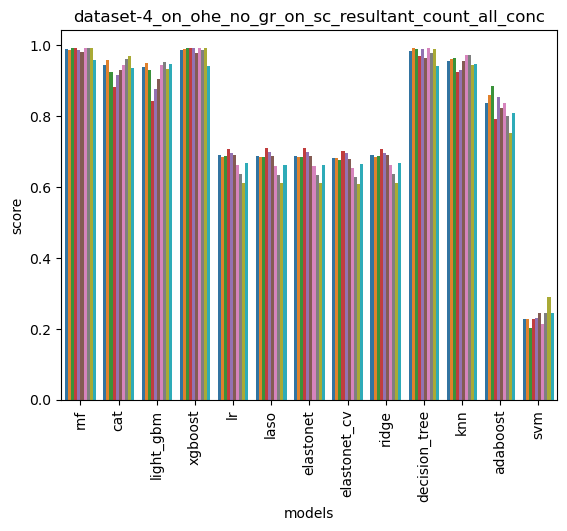

In [119]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset-4_on_ohe_no_gr_on_sc_resultant_count_all_conc')


In [93]:
cv_scores_df_with_sc_melt = cv_scores_df.melt(id_vars='models', value_vars= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]   )

Text(0.5, 1.0, 'dataset-4_on_ohe_no_gr_on_sc_resultant_count')

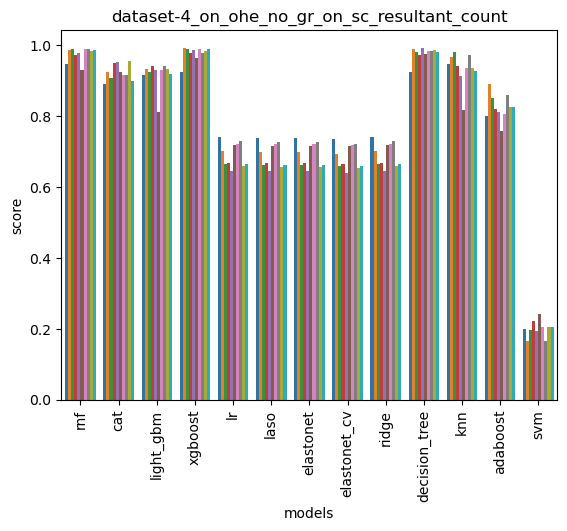

In [95]:
b = sns.barplot(x='models', y='value', hue = 'variable', data=cv_scores_df_with_sc_melt )
b.set_xticklabels(b.get_xticklabels(), rotation=90);
b.set_ylabel('score')
b.legend_.remove()
b.set_title('dataset-4_on_ohe_no_gr_on_sc_resultant_count')